# Complex Network Project

## General informations

Rappels github:
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/ruyters/CS_SCFA_RS.git
git push -u origin main

The objective of this analysis is to understand the forms of interactions of the ants, over a day, and the evolution over a period of 40 days (every 10 days). # TODO : préciser noeuds etc
The dataset is composed of ants represented by nodes, and the number of their interactions by edges.

By interaction patterns, we mean to identify different clusters of ants, which would be assigned to different tasks (which we cannot identify precisely, but that is not the point). Thus, we expect to find more interactions in sub-clusters. 
A second question is related to group dynamics: do ant subgroups remain fixed? Do they change? Can we identify ants with more interactions?

*!!annonce du plan!!*

### Sources and Packages 

Sah, Pratha; José David Méndez; Shweta Bansal, 2018, "Insecta_ants_proximity_weighted_weighted_ant_mersch_colony4_day40.graphml", Animal Social Network Repository, https://doi.org/10.7910/DVN/N5YHLL/WBH4ZT, Harvard Dataverse, V3

https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/N5YHLL/WBH4ZT&version=3.0

In [176]:
import numpy as np
import networkx as nx
import networkx.algorithms.community as nxcom
import matplotlib.pyplot as plt
import pandas as pd
import random

### Import dataset

In [226]:
# TODO : charger les données automatiquement pour élargir la recherche
graph_d1 = nx.read_graphml('ants_1.graphml')
graph_d10 = nx.read_graphml('ants_10.graphml')
graph_d20 = nx.read_graphml('ants_20.graphml')
graph_d30 = nx.read_graphml('ants_30.graphml')
graph_d40 = nx.read_graphml('ants_40.graphml')

## I. Essentials functions

#### 1. General function
The aim of this function it is to get essentials informations about the graph's structure, by graph.

Node-Edge description : 
- Neighbourhood (nodes sharing a link)
- Degree (number of neighbors)

- Out-degree (number of outgoing edges)
- In-degree (number of incoming edges)

- Weight of edge
- Strenght (sum of weight of adjacent edge)

Network descriptors: 
- Average degree: real network are sparses

In [171]:
def get_graph_general_info(graph):
    print("#####")
    print("- Number of nodes:", graph.number_of_nodes())
    print("- Number of edges:", graph.number_of_edges())
    print('- Density:', nx.density(graph))
    print('- Transitivity:',  nx.transitivity(graph))
    print('- Diameter:', nx.diameter(graph, e=None, usebounds=False))
    print('- Average shortest path:', nx.average_shortest_path_length(graph))
    # TODO : complete
    print('- Average distance:') #Must be short
    

def get_graph_general_info2(graph):
    print("Available nodes (top ten):", sorted(list(graph.nodes)[1:10]))
    print("Available edges (top ten):", sorted(list(graph.edges)[1:10]))
    print('Weighted Degree:', graph.degree())
    print("Node degree:", (dict(graph.degree())))
    print('Closeness:', sorted(nx.closeness_centrality(graph).items(), key = lambda x: x[1], reverse=True))
    print('Betweenness:', sorted(nx.betweenness_centrality(graph, k = 30, weight = 'd0').items(), key = lambda x: x[1], reverse=True))
    

def compare_network(list_graph):
    nodes = []
    edges = []
    density = []
    transitivity = []
    shortest_path =[]
    average_dist = []
    diameter = []

    for graph in list_graph:
        nodes.append(graph.number_of_nodes())
        edges.append(graph.number_of_edges())
        density.append(nx.density(graph))
        transitivity.append(nx.transitivity(graph))
        shortest_path.append(nx.average_shortest_path_length(graph))
        #nx.average
    
    dict = {
        'nodes' : nodes,
        'edges' : edges,
        'density': density,
        'transitivity': transitivity,
        'shortest_path_lenght': shortest_path
    } 
    return dict

def rand_color(nb_col):
    col = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(nb_col)]
    print(col)
    return col

# TODO : PENSER A CHANGER X SELON LE NOMBRE DE GRAPHES D'ENTREE
def plot(dico, col_list):
    col = random.choice(col_list)
    x = list([i + 1 for i in range(0, 5)])
    #x = [i * 10 for i in x]
    print(x)
    for key, val in dico.items():
        print(key, val)
        plt.bar(x,val, color = col)
        plt.title(key, fontsize= 17) 
        plt.xlabel("Day", fontsize= 13)
        #plt.ylabel("Number of Ants (Nodes)", fontsize= 13)
        plt.show()


In [26]:
get_graph_general_info(graph_d1)
get_graph_general_info(graph_d40)

#####
- Number of nodes: 102
- Number of edges: 4269
- Density: 0.8287711124053582
- Transitivity: 0.8558572372474511
- Diameter: 2
- Average shortest path: 1.1712288875946417
- Average distance:
#####
- Number of nodes: 35
- Number of edges: 485
- Density: 0.8151260504201681
- Transitivity: 0.8714934146885929
- Diameter: 2
- Average shortest path: 1.184873949579832
- Average distance:


In [101]:
dico = compare_network([graph_d1, graph_d10, graph_d20, graph_d30, graph_d40])

['#E090C5', '#21C876', '#BC1F79', '#F1A8C2', '#16ECFB']
[1, 2, 3, 4, 5]
nodes [102, 102, 73, 55, 35]


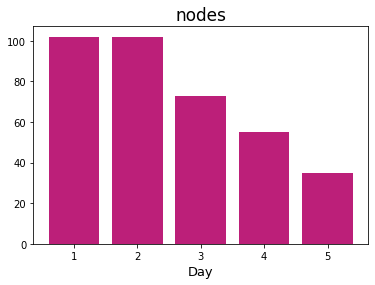

edges [4269, 4036, 2184, 1252, 485]


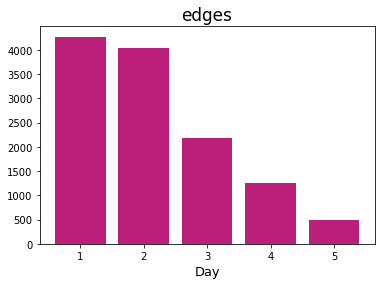

density [0.8287711124053582, 0.7835371772471365, 0.8310502283105022, 0.8430976430976431, 0.8151260504201681]


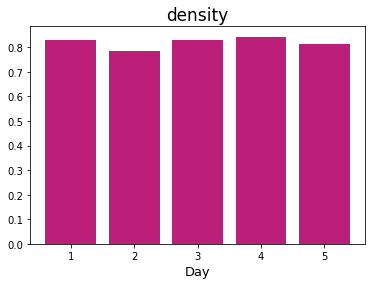

transitivity [0.8558572372474511, 0.8393503300831423, 0.8640565649169374, 0.876953090672619, 0.8714934146885929]


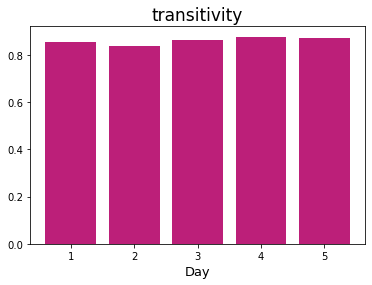

shortest_path_lenght [1.1712288875946417, 1.2164628227528635, 1.1689497716894977, 1.1569023569023569, 1.184873949579832]


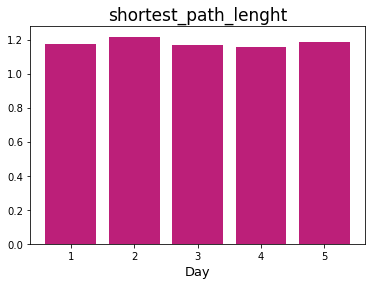

In [172]:
# TODO : PROBLEMES AVEC LES JOURS SI C'EST PAR 10 + GERER ECHELLES QUAND NOMBRE TOO LITTLE ON VOIT R
col_list = rand_color(len(dico))
plot(dico, col_list)

In [158]:
# function to return a node's neighbor nodes, ant's name and number of degree per ant as a list
def get_neighbors_degree(graph, nodes):
    neighbors2 = []
    neighbors = []
    ant = []
    degree2 = []
    for node in nodes: 
       # print(node)
        ant.append(node)
        neighbors2 = [n for n in graph.neighbors(node)]
        degree = [n[1] for n in graph.degree()]
        degree2.append(degree)
        neighbors.append(neighbors2)
        #print(neighbors2)

    return neighbors, ant, degree2

# Function toplot neighbors without weight
# TODO : qqplot loi normale
def plot_neighbors(degree):
    # plot the corresponding histogram
    plt.hist(degree, bins=50)
    plt.title("Weighted Degree Distribution", fontsize= 17) 
    plt.xlabel("Number of Neihgbors (Degrees)", fontsize= 13)
    plt.ylabel("Number of Ants (Nodes)", fontsize= 13)
    plt.show()

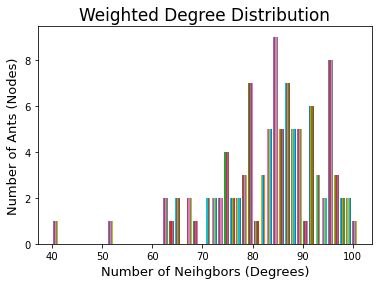

None


In [165]:
n = get_neighbors_degree(graph_d1, graph_d1.nodes)
degree = n[2]
print(plot_neighbors(degree))


Nous pouvons voir que la majorité des interactions se situe entre 70 et 100 par fourmis. Nous pouvons également voir que certaines possèdent beaucoup plus d'interactions que d'autres. Nous pouvons faire une rapide comparaisons entre J0 et J40. 

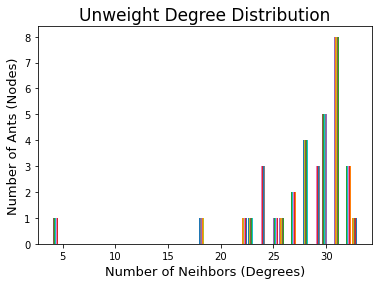

In [206]:
n = get_neighbors_degree(graph_d40, graph_d40.nodes)
degree = n[2]
plot_neighbors(degree)

Nous pouvons voir que la colonie a bien dépéri en 40 jours.

### 2. Specific function

Assortativity, community structure (modularity, )

In [ ]:
def get_graph_specific_info(graph):
    pass

def get_core_shells(graph):
    pass

In [ ]:
A = nx.adjacency_matrix(graph_d1)
print(A)

## II. Random Graph

Note à moi-même : intérêt surtout pour la distribution => particulière chez les fourmis. Donc à vérifier plus tôt si on doit faire quelque chose pour rapprocher d'une loi normale ou quoi, dans tous les cas le nombre d'interactions à des propriétés particulière qui seront investiguées dans la partie 3. 

In [173]:
rgraph = nx.gnm_random_graph(len(graph_d1.nodes), len(graph_d1.edges))
rgraph40 = nx.gnm_random_graph(len(graph_d40.nodes), len(graph_d40.edges))

#####
- Number of nodes: 35
- Number of edges: 485
- Density: 0.8151260504201681
- Transitivity: 0.8144994246260069
- Diameter: 2
- Average shortest path: 1.184873949579832
- Average distance:


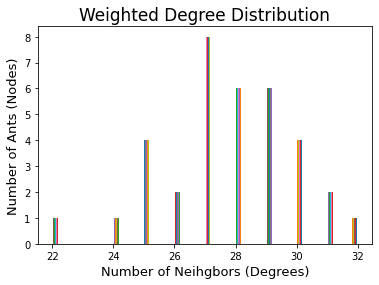

#####
- Number of nodes: 35
- Number of edges: 485
- Density: 0.8151260504201681
- Transitivity: 0.8714934146885929
- Diameter: 2
- Average shortest path: 1.184873949579832
- Average distance:


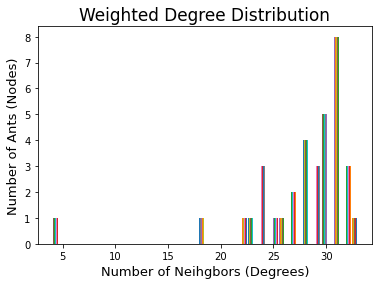

In [175]:
def wdd(graph):   
    get_graph_general_info(graph)
    n = get_neighbors_degree(graph, graph.nodes)
    degree = n[2]
    plot_neighbors(degree)

wdd(rgraph40)
wdd(graph_d40)

## III. Community - clustering functions

- Node clustering coefficient : density of the subgraph induced by neighborhood.
- Average clustering coefficient : average clustering coefficient of all nodes in the graph.  
- Global clustering coefficient : fraction of all possible triangles in the graph that do exists (must be hight)

Trouvez des communautés en G en utilisant la maximisation gourmande de la modularité.

Cette fonction utilise la maximisation gourmande de la modularité Clauset-Newman-Moore [2]. Cette méthode prend actuellement en charge la classe Graph.

La maximisation de la modularité gourmande commence avec chaque nœud de sa propre communauté et rejoint la paire de communautés qui augmente le plus la modularité jusqu'à ce qu'une telle paire n'existe pas.

In [267]:
# Find the communities
communities = sorted(nxcom.greedy_modularity_communities(graph_d10), key=len, reverse=True)
#communities = 
# Count the communities
print(f"The colony has {len(communities)} communities.")
print(list(communities))


The colony has 2 communities.
[frozenset({'Ant17', 'Ant250', 'Ant6', 'Ant298', 'Ant27', 'Ant0', 'Ant646', 'Ant252', 'Ant217', 'Ant954', 'Ant49', 'Ant299', 'Ant24', 'Ant264', 'Ant117', 'Ant564', 'Ant73', 'Ant740', 'Ant433', 'Ant391', 'Ant305', 'Ant158', 'Ant607', 'Ant540', 'Ant262', 'Ant170', 'Ant19', 'Ant334', 'Ant59', 'Ant172', 'Ant242', 'Ant929', 'Ant838', 'Ant530', 'Ant115', 'Ant356', 'Ant502', 'Ant534', 'Ant237', 'Ant326', 'Ant289', 'Ant599', 'Ant592', 'Ant263', 'Ant62', 'Ant44', 'Ant475', 'Ant4', 'Ant71', 'Ant476', 'Ant148'}), frozenset({'Ant173', 'Ant296', 'Ant614', 'Ant320', 'Ant192', 'Ant638', 'Ant14', 'Ant153', 'Ant227', 'Ant210', 'Ant397', 'Ant186', 'Ant221', 'Ant23', 'Ant2', 'Ant650', 'Ant51', 'Ant176', 'Ant96', 'Ant25', 'Ant332', 'Ant610', 'Ant507', 'Ant311', 'Ant387', 'Ant202', 'Ant593', 'Ant114', 'Ant220', 'Ant32', 'Ant245', 'Ant1', 'Ant97', 'Ant120', 'Ant191', 'Ant149', 'Ant256', 'Ant255', 'Ant5', 'Ant251', 'Ant501', 'Ant482', 'Ant632', 'Ant65', 'Ant518', 'Ant26', 'Ant14

In [241]:
cc  =  [x for x in communities]
cc =  set(cc)
type(cc)
print(cc)

{frozenset({'Ant17', 'Ant250', 'Ant6', 'Ant298', 'Ant27', 'Ant0', 'Ant646', 'Ant252', 'Ant217', 'Ant954', 'Ant49', 'Ant299', 'Ant24', 'Ant264', 'Ant117', 'Ant564', 'Ant73', 'Ant740', 'Ant433', 'Ant391', 'Ant305', 'Ant158', 'Ant607', 'Ant540', 'Ant262', 'Ant170', 'Ant19', 'Ant334', 'Ant59', 'Ant172', 'Ant242', 'Ant929', 'Ant838', 'Ant530', 'Ant115', 'Ant356', 'Ant502', 'Ant534', 'Ant237', 'Ant326', 'Ant289', 'Ant599', 'Ant592', 'Ant263', 'Ant62', 'Ant44', 'Ant475', 'Ant4', 'Ant71', 'Ant476', 'Ant148'}), frozenset({'Ant173', 'Ant296', 'Ant614', 'Ant320', 'Ant192', 'Ant638', 'Ant14', 'Ant153', 'Ant227', 'Ant210', 'Ant397', 'Ant186', 'Ant221', 'Ant23', 'Ant2', 'Ant650', 'Ant51', 'Ant176', 'Ant96', 'Ant25', 'Ant332', 'Ant610', 'Ant507', 'Ant311', 'Ant387', 'Ant202', 'Ant593', 'Ant114', 'Ant220', 'Ant32', 'Ant245', 'Ant1', 'Ant97', 'Ant120', 'Ant191', 'Ant149', 'Ant256', 'Ant255', 'Ant5', 'Ant251', 'Ant501', 'Ant482', 'Ant632', 'Ant65', 'Ant518', 'Ant26', 'Ant140', 'Ant353', 'Ant261', 'Ant12

In [281]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    graph = G
    for c, c_v in enumerate(communities):
            # Add 1 to save 0 for external edges
            print(c_v)
            graph.nodes[c_v]['community'] = c + 1
    print (graph)
    return graph

def set_edge_community(graph):
    G = graph
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0
    return G

def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)     

# Set node and edge communities
def communities(graph, communities):
    g = set_node_community(graph, communities)
    e = set_edge_community(graph)

    node_color = [get_color(graph.nodes[v]['community']) for v in graph.nodes]

    # Set community color for edges between members of the same community (internal) and intra-community edges (external)
    external = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] == 0]
    internal = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] > 0]
    internal_color = ['black' for e in internal]

    return node_color, external, internal, internal_color

In [283]:
node_community = set_node_community(graph_d10, graph_d10.nodes)
#print(node_community)

Ant387
Ant356
Ant353
Ant540
Ant227
Ant114
Ant117
Ant221
Ant220
Ant191
Ant192
Ant518
Ant929
Ant320
Ant326
Ant650
Ant252
Ant250
Ant251
Ant256
Ant153
Ant126
Ant255
Ant24
Ant25
Ant26
Ant27
Ant23
Ant120
Ant482
Ant838
Ant5
Ant332
Ant334
Ant647
Ant646
Ant564
Ant242
Ant245
Ant51
Ant59
Ant140
Ant305
Ant148
Ant149
Ant476
Ant475
Ant115
Ant44
Ant49
Ant501
Ant740
Ant954
Ant0
Ant263
Ant262
Ant261
Ant264
Ant158
Ant311
Ant391
Ant397
Ant502
Ant4
Ant6
Ant1
Ant507
Ant2
Ant73
Ant71
Ant610
Ant592
Ant19
Ant614
Ant599
Ant14
Ant17
Ant97
Ant96
Ant298
Ant299
Ant296
Ant217
Ant210
Ant62
Ant65
Ant607
Ant593
Ant289
Ant173
Ant172
Ant170
Ant176
Ant202
Ant638
Ant32
Ant632
Ant530
Ant534
Ant237
Ant433
Ant186
Graph with 102 nodes and 4036 edges


In [284]:
edge_community = set_edge_community(graph_d10)
print(edge_community)

Graph with 102 nodes and 4036 edges


In [286]:
communities_ants = communities(graph_d1, graph_d1.nodes)

Ant387
Ant356
Ant353
Ant540
Ant227
Ant114
Ant117
Ant221
Ant220
Ant191
Ant192
Ant518
Ant929
Ant320
Ant326
Ant650
Ant252
Ant250
Ant251
Ant256
Ant261
Ant126
Ant255
Ant24
Ant25
Ant26
Ant27
Ant23
Ant120
Ant482
Ant838
Ant5
Ant332
Ant334
Ant647
Ant646
Ant564
Ant242
Ant245
Ant51
Ant59
Ant140
Ant305
Ant148
Ant149
Ant476
Ant475
Ant115
Ant44
Ant49
Ant501
Ant740
Ant954
Ant0
Ant263
Ant262
Ant153
Ant264
Ant158
Ant311
Ant391
Ant397
Ant502
Ant4
Ant6
Ant1
Ant507
Ant2
Ant73
Ant71
Ant593
Ant592
Ant19
Ant614
Ant599
Ant14
Ant17
Ant97
Ant96
Ant298
Ant299
Ant296
Ant217
Ant210
Ant62
Ant65
Ant607
Ant610
Ant289
Ant173
Ant172
Ant170
Ant176
Ant202
Ant638
Ant32
Ant632
Ant530
Ant534
Ant237
Ant433
Ant186
Graph with 102 nodes and 4269 edges


In [287]:
print(communities_ants)

([(0.42000000000000004, 0.6333333333333333, 0.8466666666666667), (0.5800000000000001, 0.9, 0.3666666666666667), (0.7400000000000001, 0.31333333333333335, 0.7400000000000001), (0.9, 0.5800000000000001, 0.26), (0.20666666666666667, 0.8466666666666667, 0.6333333333333333), (0.3666666666666667, 0.26, 0.15333333333333335), (0.5266666666666667, 0.5266666666666667, 0.5266666666666667), (0.6866666666666666, 0.7933333333333333, 0.9), (0.8466666666666667, 0.20666666666666667, 0.42000000000000004), (0.15333333333333335, 0.4733333333333334, 0.7933333333333333), (0.31333333333333335, 0.7400000000000001, 0.31333333333333335), (0.4733333333333334, 0.15333333333333335, 0.6866666666666666), (0.6333333333333333, 0.42000000000000004, 0.20666666666666667), (0.7933333333333333, 0.6866666666666666, 0.5800000000000001), (0.1, 0.1, 0.1), (0.26, 0.3666666666666667, 0.4733333333333334), (0.42000000000000004, 0.6333333333333333, 0.8466666666666667), (0.5800000000000001, 0.9, 0.3666666666666667), (0.7400000000000

In [289]:
def visu_community(graph, communities):
    graph_pos = nx.spring_layout(graph)
    plt.rcParams.update({'figure.figsize': (15, 10)})
    # Draw external edges
    nx.draw_networkx(
        graph,
        pos=graph_pos,
        node_size=0,
        edgelist=communities[1],
        edge_color="silver")
    # Draw nodes and internal edges
    nx.draw_networkx(
        graph,
        pos=graph_pos,
        node_color=communities[0],
        edgelist=communities[2],
        edge_color=communities[3])

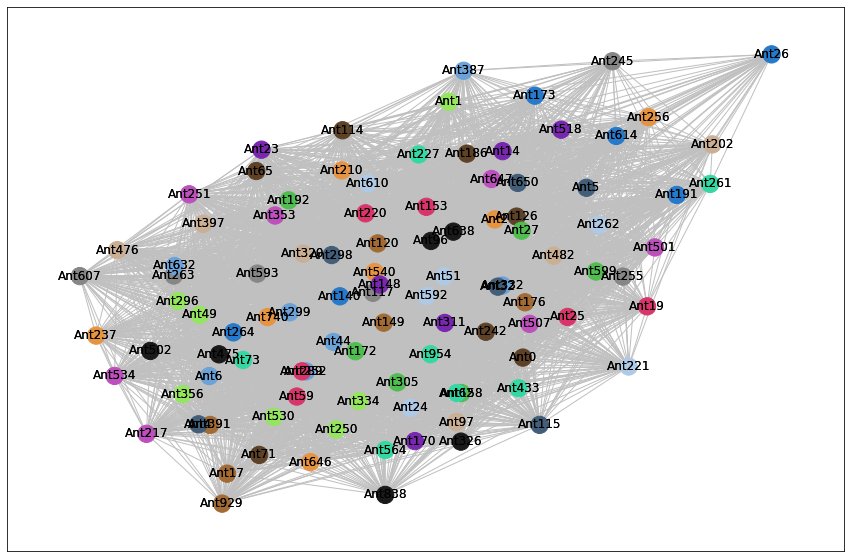

In [291]:
visu_community(graph_d1, communities_ants)

In [54]:
def get_local_cluster_coefficient(graph):
    loc_cluster = pd.DataFrame(sorted(nx.clustering(graph).items(), 
                                 key=lambda item: -item[1]), 
                      columns=["node", "LCC"])
    return loc_cluster

def get_average_clustering(graph):
    ac = nx.average_clustering(graph)
    return ac

# à partir de là, utilité à méditer
def get_generalized_degree(graph):
    gd = nx.generalized_degree(graph)
    return gd

def get_triangles(graph):
    t = nx.triangles(graph)
    return t

In [62]:
print(get_local_cluster_coefficient(graph_d1))
print(get_local_cluster_coefficient(graph_d10))
print(get_local_cluster_coefficient(graph_d20))
print(get_local_cluster_coefficient(graph_d30))
print(get_local_cluster_coefficient(graph_d40))

       node       LCC
0     Ant17  0.921147
1    Ant217  0.902616
2     Ant26  0.901282
3    Ant170  0.894053
4    Ant237  0.893455
..      ...       ...
97    Ant96  0.831581
98   Ant298  0.831581
99   Ant507  0.830212
100  Ant540  0.829932
101  Ant148  0.825347

[102 rows x 2 columns]
       node       LCC
0     Ant26  0.987179
1    Ant237  0.912821
2    Ant114  0.911348
3    Ant391  0.905769
4    Ant217  0.905341
..      ...       ...
97   Ant191  0.800866
98   Ant149  0.800247
99     Ant2  0.792833
100  Ant126  0.791518
101  Ant256  0.790726

[102 rows x 2 columns]
      node       LCC
0   Ant191  1.000000
1     Ant6  0.889897
2   Ant334  0.889266
3   Ant262  0.888992
4   Ant530  0.888471
..     ...       ...
68   Ant96  0.845238
69  Ant256  0.837662
70  Ant120  0.836310
71  Ant210  0.836158
72  Ant140  0.820704

[73 rows x 2 columns]
      node       LCC
0    Ant44  0.928205
1    Ant17  0.918051
2   Ant311  0.917548
3   Ant334  0.912892
4   Ant299  0.911111
5   Ant170  0.907493
6 

## Visualisation

In [123]:
ant_color_dict = {
    'Ant17': '#aff8df',
    'Ant217': '#ffcbc1'
}

# function to assign color for node visualization
def create_node_colors_from_graph(graph, club_color_dict):
    node_colors = []
    for node, club in list(graph.nodes(data="Ant17")):
        if club in club_color_dict:
            node_colors.append(club_color_dict[club])
    return node_colors

# get node colors for plotting
node_colors = create_node_colors_from_graph(graph_d1, ant_color_dict)


def visualisation(graph):
    pos = nx.spring_layout(graph, 
                       k=0.3, iterations=50,
                       seed=2)

    plt.figure(1,figsize=(10,6)) 
    nx.draw(graph,
            pos = pos,
            node_color=node_colors,
            node_size=1000,
            with_labels=True,
            font_size = 20,
            font_color='black')
    plt.title("Ants Network")
    plt.show()

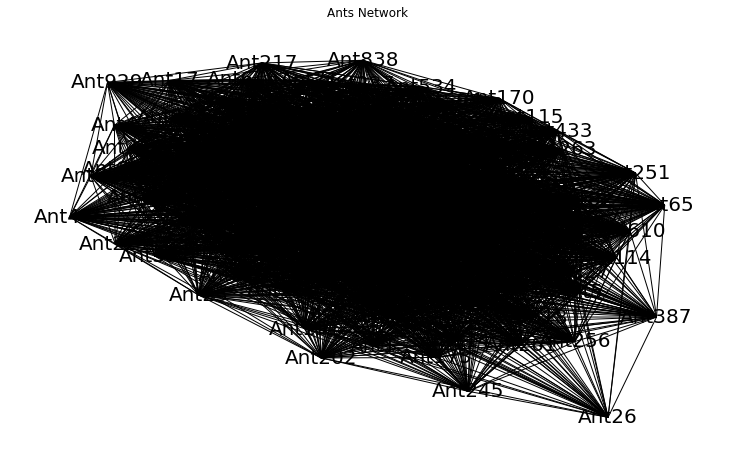

In [124]:
visualisation(graph_d1)

## Dynamic Network